<a href="https://colab.research.google.com/github/Daryldactyl/GoogleStock_RNN/blob/main/GoogleStock_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/Daryldactyl/GoogleStock_RNN/Files/Google_Stock_Price_Train.csv")
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = df_train.iloc[:, 1:2].values

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_sc = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [6]:
#This will make each row into 60 columns that show the previous 60 days of the stocks open price
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(training_set_sc[i-60:i, 0])
  y_train.append(training_set_sc[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

### Initialising the RNN

In [12]:
rnn = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [13]:
rnn.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
rnn.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [14]:
rnn.add(LSTM(units=50, return_sequences=True))
rnn.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [15]:
rnn.add(LSTM(units=50, return_sequences=True))
rnn.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [16]:
rnn.add(LSTM(units=50))
rnn.add(Dropout(0.2))

### Adding the output layer

In [17]:
rnn.add(Dense(units=1))

### Compiling the RNN

In [18]:
rnn.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [20]:
rnn.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0048
Epoch 2/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0049
Epoch 3/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0041
Epoch 7/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0041
Epoch 8/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0037
Epoch 12/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0038
Epoch 13/100


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [21]:
df_test = pd.read_csv("https://raw.githubusercontent.com/Daryldactyl/GoogleStock_RNN/Files/Google_Stock_Price_Test.csv")
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [23]:
#The training set ends in December 2016 and this test set is for January 2017
real_stock = df_test.iloc[:, 1:2].values
real_stock

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

In [24]:
#Since we need the test to be the same setup where it grabs the current open and the last 60 days so we need to concat our previous df to the new
dataset_total = pd.concat((df_train['Open'], df_test['Open']), axis=0)

#Now we need to create the same dataframe as before with a lower bound of current price and last 60 days and the upper bound being the last price observed in JAN 2017
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values

#This DF needs reshaped for 1 long column and to be scaled to enter the RNN
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

#Create x_test identical to train
x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)

In [25]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [26]:
predicted_stock = rnn.predict(x_test)
predicted_stock = sc.inverse_transform(predicted_stock)

1/1 [==============================] - 2s 2s/step


### Visualising the results

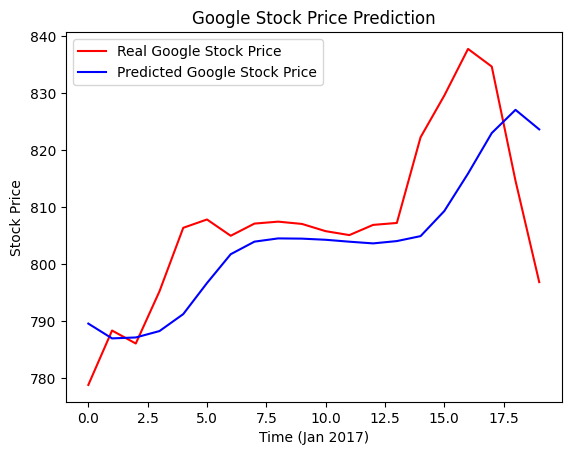

In [27]:
plt.plot(real_stock, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time (Jan 2017)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()